# Extracting the data from dataset

In [1]:
import zipfile
with zipfile.ZipFile('airqual.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Code


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor


In [3]:
df=pd.read_csv('city_day.csv')

In [4]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df.shape

(29531, 16)

In [6]:
df.info()
# Checking the over all information on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [7]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [9]:
df.nunique()
# These are all the unique values present in the dataframe

City             26
Date           2009
PM2.5         11716
PM10          12571
NO             5776
NO2            7404
NOx            8156
NH3            5922
CO             1779
SO2            4761
O3             7699
Benzene        1873
Toluene        3608
Xylene         1561
AQI             829
AQI_Bucket        6
dtype: int64

In [10]:
df['City'].value_counts()

City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64

**Filling in the missing values.**


*   For Numerical Values, we use Mean()
*   For Categorical Values, we use Mode()





In [11]:
df['PM2.5']=df['PM2.5'].fillna(df['PM2.5'].mean())
df['PM10']=df['PM10'].fillna(df['PM10'].mean())
df['NO']=df['NO'].fillna(df['NO'].mean())
df['NO2']=df['NO2'].fillna(df['NO2'].mean())
df['NOx']=df['NOx'].fillna(df['NOx'].mean())
df['NH3']=df['NH3'].fillna(df['NH3'].mean())
df['CO']=df['CO'].fillna(df['CO'].mean())
df['SO2']=df['SO2'].fillna(df['SO2'].mean())
df['O3']=df['O3'].fillna(df['O3'].mean())
df['Benzene']=df['Benzene'].fillna(df['Benzene'].mean())
df['Toluene']=df['Toluene'].fillna(df['Toluene'].mean())
df['Xylene']=df['Xylene'].fillna(df['Xylene'].mean())
df['AQI']=df['AQI'].fillna(df['AQI'].mode()[0])
df['AQI_Bucket']=df['AQI_Bucket'].fillna('Moderate')

In [12]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,102.0,Moderate
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,102.0,Moderate
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,102.0,Moderate
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,102.0,Moderate
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,102.0,Moderate


In [13]:
# how much is the average amount of pollution in each city stations
most_polluted = df[['City', 'AQI','PM2.5', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM2.5,PM10,CO
City,,,,
Ahmedabad,334.485814,67.728234,117.409318,16.147420
Delhi,258.703833,117.146631,228.413747,1.976053
Lucknow,211.276755,107.568277,118.127103,2.131976
Patna,210.979010,113.815353,119.013316,1.591700
Gurugram,208.550923,112.549731,150.467320,1.321857
Talcher,155.490811,62.607920,156.552639,1.911862
Jorapokhar,139.759624,66.406088,142.240508,1.358846
Guwahati,139.579681,63.692929,116.604900,0.738284
Brajrajnagar,138.699360,64.726798,123.094114,1.870288


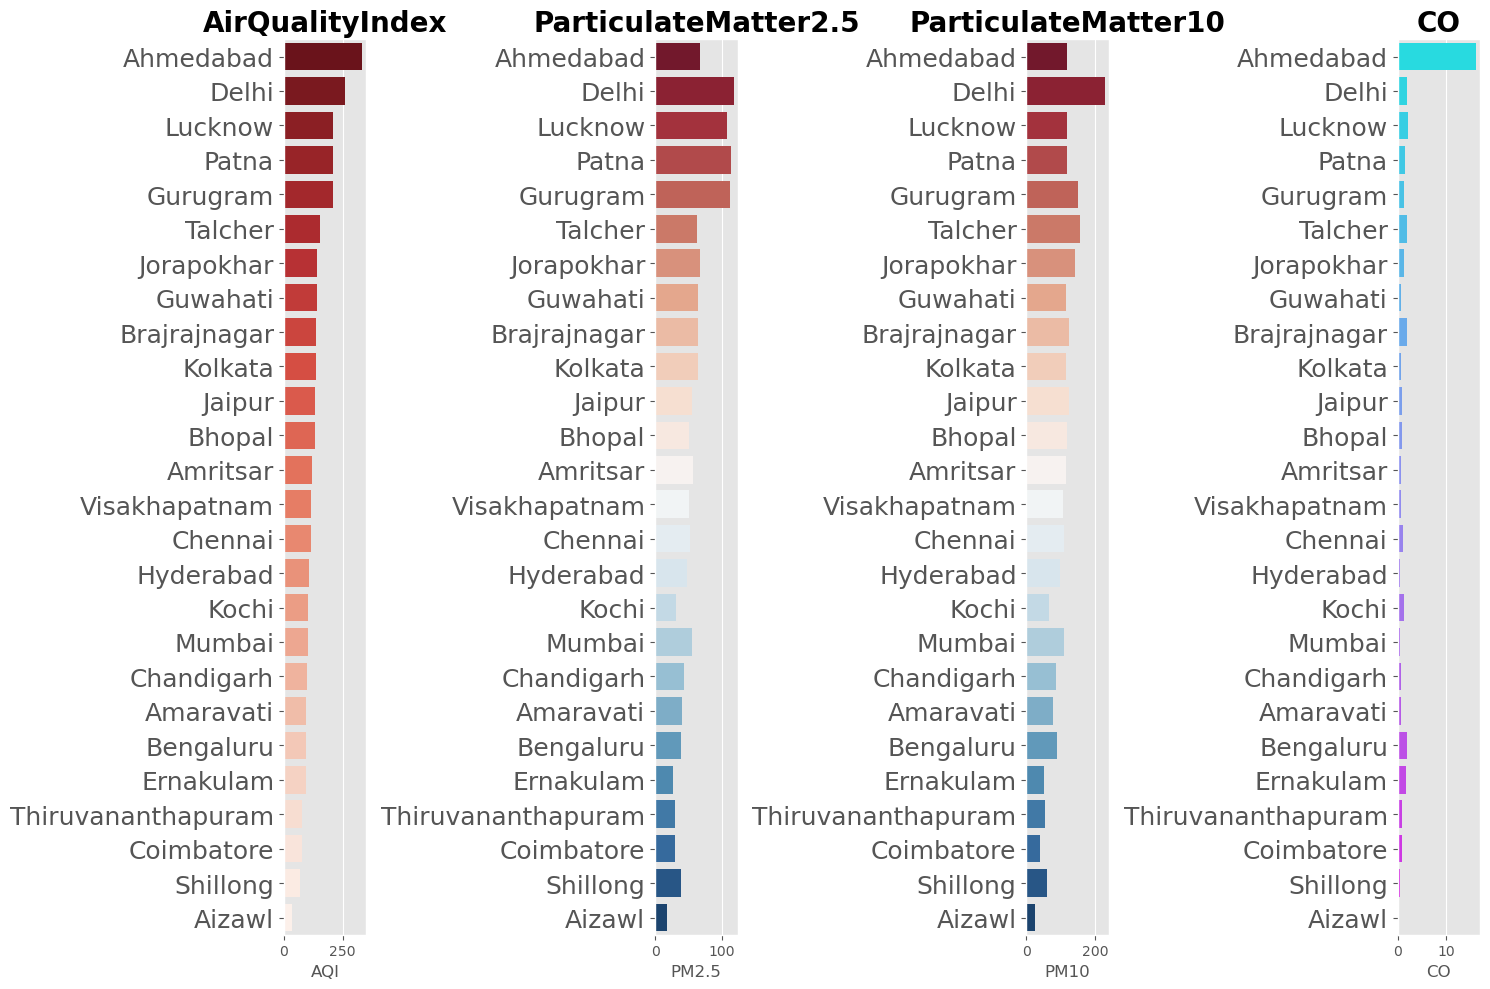

In [14]:

plt.style.use('ggplot')  # Use 'ggplot' style instead of 'seaborn-whitegrid'
f, ax_ = plt.subplots(1, 4, figsize = (15,10))

bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted['PM2.5'],
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.PM10,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[2]);

bar1 = sns.barplot(x = most_polluted.CO,
                   y = most_polluted.index,
                   palette = 'cool',
                   ax = ax_[3]);

titles = ['AirQualityIndex', 'ParticulateMatter2.5' , 'ParticulateMatter10', 'CO']
for i in range(4) :
    ax_[i].set_ylabel('')
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize =18);
    ax_[i].set_title(titles[i], fontsize = 20 , weight = 'bold')
    f.tight_layout()


# **PM 2.5 levels in Delhi over the years**



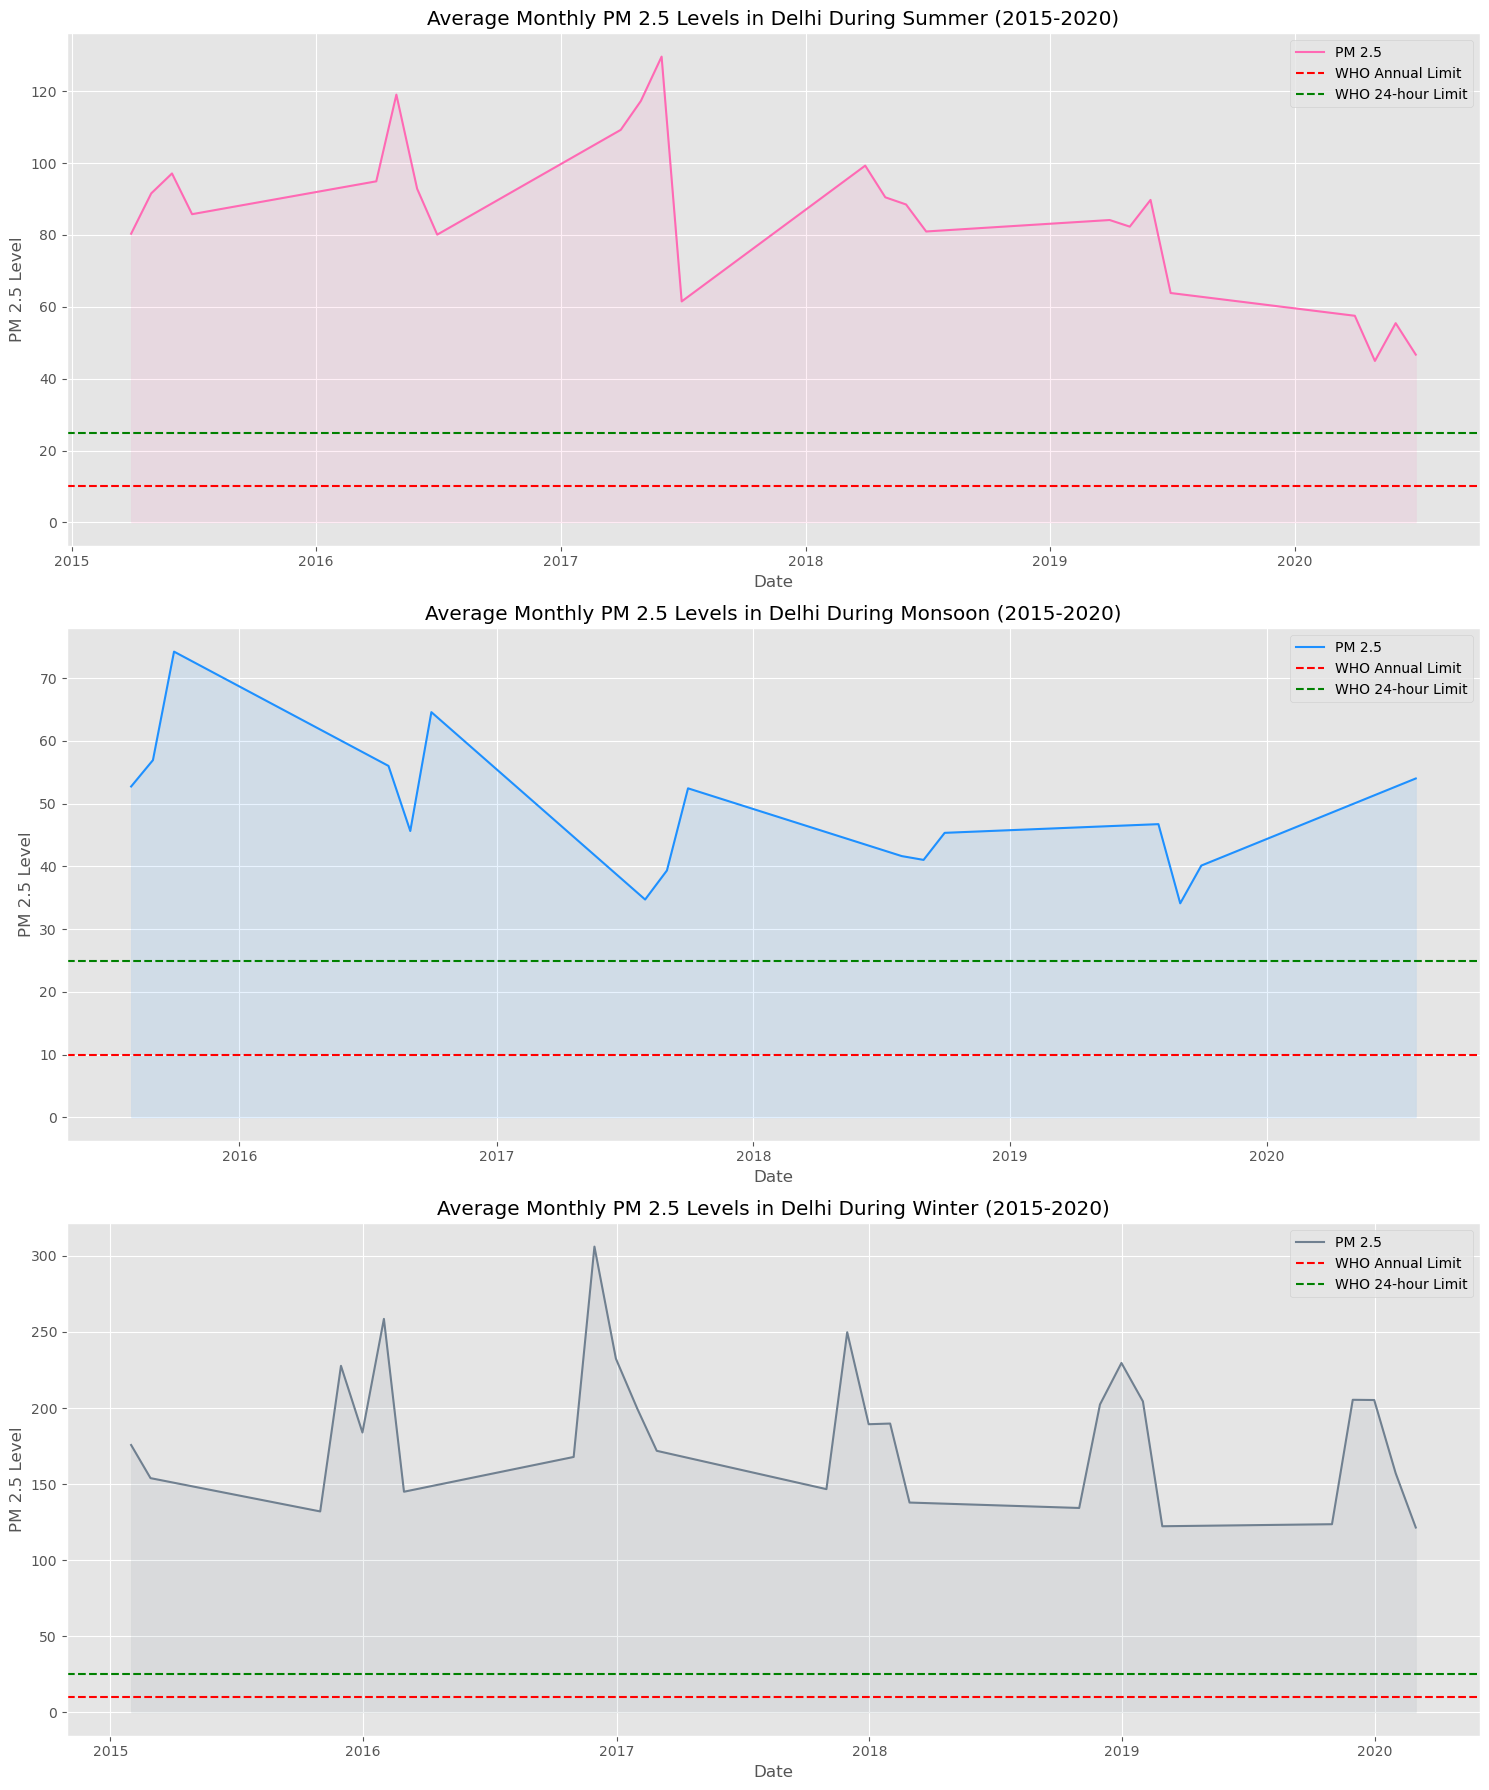

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df_delhi = df[df['City'] == 'Delhi']
df_delhi.set_index('Date', inplace=True)
monthly_avg = df_delhi['PM2.5'].resample('M').mean()

summer_months = [3, 4, 5, 6]
monsoon_months = [7, 8, 9]
winter_months = [10, 11, 12, 1, 2]

summer_data = monthly_avg[monthly_avg.index.month.isin(summer_months)]
monsoon_data = monthly_avg[monthly_avg.index.month.isin(monsoon_months)]
winter_data = monthly_avg[monthly_avg.index.month.isin(winter_months)]

import seaborn as sns

def plot_data(ax, data, title, color):
    ax.plot(data.index, data, label='PM 2.5', color=color)
    ax.fill_between(data.index, data, color=color, alpha=0.1)
    ax.axhline(y=10, color='r', linestyle='--', label='WHO Annual Limit')  # Add dotted line for WHO annual limit
    ax.axhline(y=25, color='g', linestyle='--', label='WHO 24-hour Limit')  # Add dotted line for WHO 24-hour limit
    ax.xaxis.set_major_locator(mdates.YearLocator())  # to get a tick every year
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format the ticks to show year
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('PM 2.5 Level')
    ax.legend()

colors = {'summer': mcolors.CSS4_COLORS['hotpink'], 
          'monsoon': mcolors.CSS4_COLORS['dodgerblue'], 
          'winter': mcolors.CSS4_COLORS['slategray']}

fig, axs = plt.subplots(3, 1, figsize=(15,18)) 

plot_data(axs[0], summer_data, 'Average Monthly PM 2.5 Levels in Delhi During Summer (2015-2020)', colors['summer'])
plot_data(axs[1], monsoon_data, 'Average Monthly PM 2.5 Levels in Delhi During Monsoon (2015-2020)', colors['monsoon'])
plot_data(axs[2], winter_data, 'Average Monthly PM 2.5 Levels in Delhi During Winter (2015-2020)', colors['winter'])

plt.tight_layout()
plt.show()

#Add dotted line for the refernce value for PM 2.5 safe values




Edit the above waveform such that it is divided into 3-4 waveforms having different waveforms and then showing the PM 2.5 levels in each season.

The graph vividly illustrates the seasonal fluctuations in PM 2.5 levels in Delhi, with a pronounced spike observed during the winter months from October to February. This surge coincides with the stubble-burning practices prevalent in the neighboring states of Punjab and Haryana. The correlation suggests a significant contribution of these agricultural activities to the heightened PM 2.5 concentrations during this period. Thus, the data underscores the environmental impact of stubble burning, manifesting as increased air pollution levels in Delhi during winter.

**Classifying pollutants into 2 categories:**

1.   **Vehicular Pollutants:** PM2.5 , PM10 , NO , NOx , NH3 , CO
2.   **Industrial Pollutants:** SO2 , O3 , BENZENE , TOLUENE , XYLENE



In [16]:
df1=df.copy()
df1['Vehicle_Pollution_content']=df1['PM2.5']+df1['PM10']+df1['NO']+df1['NOx']+df1['NH3']+df1['CO']
df1['Industry_pollutants']=df1['SO2']+df1['O3']+df1['Benzene']+df1['Toluene']+df1['Xylene']
df1.drop(['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene'],axis=1,inplace=True)
df1.head()

,City,Date,AQI,AQI_Bucket,Vehicle_Pollution_content,Industry_pollutants
0,Ahmedabad,2015-01-01,102.0,Moderate,228.051157,161.02
1,Ahmedabad,2015-01-02,102.0,Moderate,227.461157,71.56
2,Ahmedabad,2015-01-03,102.0,Moderate,273.561157,85.22
3,Ahmedabad,2015-01-04,102.0,Moderate,230.431157,70.24
4,Ahmedabad,2015-01-05,102.0,Moderate,291.021157,107.32


In [17]:
df1.describe()

,Date,AQI,Vehicle_Pollution_content,Industry_pollutants
count,29531,29531.000000,29531.000000,29531.000000
mean,2018-05-14 05:40:15.807118080,156.245369,261.193608,64.075348
min,2015-01-01 00:00:00,13.000000,7.040000,3.340000
25%,2017-04-16 00:00:00,88.000000,171.455000,41.090000
50%,2018-08-05 00:00:00,103.000000,238.610000,54.410128
75%,2019-09-03 00:00:00,179.000000,301.453841,73.275550
max,2020-07-01 00:00:00,2049.000000,2123.690000,971.490128
std,NaN,131.194189,152.524948,44.544707


In [18]:
#IDENTIFYING OUTLIERS amongst Vehicular Pollutants
outliers1=df1.loc[df1['Vehicle_Pollution_content'] > (1000)]
outliers1

,City,Date,AQI,AQI_Bucket,Vehicle_Pollution_content,Industry_pollutants
1746,Ahmedabad,2019-10-13,1595.0,Severe,1015.963476,68.251977
3143,Amritsar,2017-05-08,110.0,Moderate,1060.519123,58.961940
3145,Amritsar,2017-05-10,102.0,Moderate,1051.349123,46.141940
3545,Amritsar,2018-06-14,732.0,Severe,1182.568598,43.250000
3546,Amritsar,2018-06-15,869.0,Severe,1126.858598,44.130000
...,...,...,...,...,...,...
25728,Shillong,2019-09-02,102.0,Moderate,1906.180000,37.720128
25729,Shillong,2019-09-03,102.0,Moderate,1909.260000,34.870128
26096,Talcher,2018-02-22,474.0,Severe,1074.490000,100.160128
26106,Talcher,2018-03-04,484.0,Severe,1163.670000,86.670128


In [19]:
#IDENTIFYING OUTLIERS amongst Insdutrial Pollutants
outliers2=df1.loc[df1['Industry_pollutants'] > (800)]
outliers2

,City,Date,AQI,AQI_Bucket,Vehicle_Pollution_content,Industry_pollutants
25873,Shillong,2020-01-25,68.0,Satisfactory,102.99,910.650128
25874,Shillong,2020-01-26,74.0,Satisfactory,105.60,925.730128
25906,Shillong,2020-02-27,60.0,Satisfactory,50.26,848.800128
25907,Shillong,2020-02-28,42.0,Good,46.68,842.080128
25908,Shillong,2020-02-29,51.0,Satisfactory,49.98,944.340128
25909,Shillong,2020-03-01,53.0,Satisfactory,69.49,908.970128
25910,Shillong,2020-03-02,60.0,Satisfactory,88.69,917.070128
25911,Shillong,2020-03-03,63.0,Satisfactory,71.86,916.140128
25912,Shillong,2020-03-04,64.0,Satisfactory,90.79,947.480128
25913,Shillong,2020-03-05,63.0,Satisfactory,65.67,918.770128


In [20]:
#IN ORDER TO SEE EVERY COLUMN IN THE DATASET
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [21]:
#Creating Dummies for City Column
df1=pd.get_dummies(df1,drop_first=True)
print(df1.shape)
df1.head()

(29531, 34)


,Date,AQI,Vehicle_Pollution_content,Industry_pollutants,City_Aizawl,City_Amaravati,City_Amritsar,City_Bengaluru,City_Bhopal,City_Brajrajnagar,City_Chandigarh,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Gurugram,City_Guwahati,City_Hyderabad,City_Jaipur,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor
0,2015-01-01,102.0,228.051157,161.02,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,2015-01-02,102.0,227.461157,71.56,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,2015-01-03,102.0,273.561157,85.22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,2015-01-04,102.0,230.431157,70.24,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,2015-01-05,102.0,291.021157,107.32,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


***AS AQI IS DEPENDENT VARIABLE WE DROPING IT FROM DATASET AND PUTING IT IN Y***

In [22]:
X=df1.drop(['AQI'],axis=1)
y=df1['AQI']
print(X.shape)
print(y.shape)

(29531, 33)
(29531,)


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
# Convert datetime column to Unix timestamp and then to integer
X_train['Date'] = X_train['Date'].apply(lambda x: x.timestamp()).astype(int)
X_test['Date'] = X_test['Date'].apply(lambda x: x.timestamp()).astype(int)


**Random Forest Regressor**

In [25]:
# Random Forest Regressor
model_rfr=RandomForestRegressor()
model_rfr.fit(X_train,y_train)
pred_rfr = model_rfr.predict(X_test)
score_rfr = model_rfr.score(X_test, y_test)
rmse_rfr = mean_squared_error(y_test, pred_rfr, squared=False)
r_rfr = pearsonr(y_test, pred_rfr)[0]

**Linear Regression**

In [26]:
# Linear Regression
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
pred_lr = model_lr.predict(X_test)
score_lr = model_lr.score(X_test, y_test)
rmse_lr = mean_squared_error(y_test, pred_lr, squared=False)
r_lr = pearsonr(y_test, pred_lr)[0]

**Decision Tree Regressor**

In [27]:
# DecisionTree Regressor
model_DT=DecisionTreeRegressor()
model_DT.fit(X_train,y_train)
pred_DT = model_DT.predict(X_test)
score_DT = model_DT.score(X_test, y_test)
rmse_DT = mean_squared_error(y_test, pred_DT, squared=False)
r_DT = pearsonr(y_test, pred_DT)[0]

**Gradient Boost Regression**

In [28]:
#Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, y_train)
pred_gbr = model_gbr.predict(X_test)
score_gbr = model_gbr.score(X_test, y_test)
rmse_gbr = mean_squared_error(y_test, pred_gbr, squared=False)
r_gbr = pearsonr(y_test, pred_gbr)[0]

**Ridge Regressor**

In [29]:
# Ridge Regressor
model_ridge = Ridge() 
model_ridge.fit(X_train, y_train)
pred_ridge = model_ridge.predict(X_test)
score_ridge = model_ridge.score(X_test, y_test)
rmse_ridge = mean_squared_error(y_test, pred_ridge, squared=False)
r_ridge = pearsonr(y_test, pred_ridge)[0]

**AdaBoost Regressor**

In [30]:
#AdaBoost Regressor
model_abr = AdaBoostRegressor()
model_abr.fit(X_train, y_train)
pred_abr = model_abr.predict(X_test)
score_abr = model_abr.score(X_test, y_test)
rmse_abr = mean_squared_error(y_test, pred_abr, squared=False)
r_abr = pearsonr(y_test, pred_abr)[0]

**ExtraTrees Regressor**

In [31]:
#Extra Trees Regressor
model_etr = ExtraTreesRegressor()
model_etr.fit(X_train, y_train)
pred_etr = model_etr.predict(X_test)
score_etr = model_etr.score(X_test, y_test)
rmse_etr = mean_squared_error(y_test, pred_etr, squared=False)
r_etr = pearsonr(y_test, pred_etr)[0]

**CatBoost Regressor**

In [32]:
# CatBoost Regressor
model_cb = CatBoostRegressor()
model_cb.fit(X_train, y_train)
pred_cb = model_cb.predict(X_test)
score_cb = model_cb.score(X_test, y_test)
rmse_cb = mean_squared_error(y_test, pred_cb, squared=False)
r_cb = pearsonr(y_test, pred_cb)[0]

Learning rate set to 0.067479
0:	learn: 123.0769775	total: 182ms	remaining: 3m 1s
1:	learn: 116.4826616	total: 204ms	remaining: 1m 41s
2:	learn: 110.3310376	total: 215ms	remaining: 1m 11s
3:	learn: 104.6032408	total: 224ms	remaining: 55.8s
4:	learn: 99.3087743	total: 245ms	remaining: 48.8s
5:	learn: 94.4341476	total: 269ms	remaining: 44.6s
6:	learn: 89.9767136	total: 284ms	remaining: 40.3s
7:	learn: 86.0259115	total: 292ms	remaining: 36.3s
8:	learn: 82.2825684	total: 300ms	remaining: 33s
9:	learn: 78.8430572	total: 307ms	remaining: 30.4s
10:	learn: 75.7938978	total: 315ms	remaining: 28.3s
11:	learn: 72.8017757	total: 323ms	remaining: 26.6s
12:	learn: 70.2130456	total: 328ms	remaining: 24.9s
13:	learn: 67.8171415	total: 353ms	remaining: 24.9s
14:	learn: 65.7710407	total: 361ms	remaining: 23.7s
15:	learn: 63.8463183	total: 367ms	remaining: 22.6s
16:	learn: 61.8793642	total: 372ms	remaining: 21.5s
17:	learn: 60.1836851	total: 381ms	remaining: 20.8s
18:	learn: 58.8015706	total: 387ms	remai

**Ensemble Model**

In [33]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import numpy as np

class WeightedEnsembleModel:
    def __init__(self, weights):
        self.weights = np.array(weights)
        self.models = [
            ExtraTreesRegressor(),
            CatBoostRegressor(verbose=False),
            RandomForestRegressor()
        ]
    
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
    
    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.average(predictions, axis=0, weights=self.weights)
    
    def score(self, X, y):
        predictions = self.predict(X)
        return r2_score(y, predictions)

# Usage
ensemble = WeightedEnsembleModel(weights=[0.4, 0.3, 0.3])
ensemble.fit(X_train, y_train)
ensemble_predictions = ensemble.predict(X_test)

# Calculate the performance metrics
score_ensemble = ensemble.score(X_test, y_test)
rmse_ensemble = mean_squared_error(y_test, ensemble_predictions, squared=False)
r_ensemble = pearsonr(y_test, ensemble_predictions)[0]


In [34]:
score_data = {
    'Model': ['Random Forest Regressor', 'Linear Regression', 'Decision Tree Classifier', 'GradientBoost Regressor', 'Ridge Regressor', 'AdaBoost Regressor', 'ExtraTrees Regressor', 'CatBoost Regressor', 'Weighted Ensemble Model'],
    'R_squared': [score_rfr, score_lr, score_DT, score_gbr, score_ridge, score_abr, score_etr, score_cb, score_ensemble],
    'r': [r_rfr, r_lr, r_DT, r_gbr, r_ridge, r_abr, r_etr, r_cb, r_ensemble],
    'RMSE': [rmse_rfr, rmse_lr, rmse_DT, rmse_gbr, rmse_ridge, rmse_abr, rmse_etr, rmse_cb, rmse_ensemble]
}

df_score = pd.DataFrame(score_data)

print(df_score)


                      Model  R_squared         r       RMSE
0   Random Forest Regressor   0.911117  0.954684  40.275058
1         Linear Regression   0.803090  0.896175  59.945993
2  Decision Tree Classifier   0.835595  0.914865  54.775173
3   GradientBoost Regressor   0.872171  0.935296  48.299355
4           Ridge Regressor   0.803049  0.896157  59.952189
5        AdaBoost Regressor   0.791733  0.898125  61.650459
6      ExtraTrees Regressor   0.907579  0.952963  41.068644
7        CatBoost Regressor   0.909767  0.954043  40.579660
8   Weighted Ensemble Model   0.915716  0.956979  39.219191


# Inferences from Accuracy Scores:

**Random Forest Regressor (RFR):**
- **Functionality**: RFR is used for predicting continuous outcomes (like house prices or temperature) based on input features (like square footage or location).
- **Accuracy**: With a high accuracy score of 0.891798, RFR demonstrates a good fit to your data.
- **Mechanism**: RFR operates by combining multiple decision trees to make predictions, effectively handling non-linear patterns and preventing overfitting.

**Linear Regression:**
- **Functionality**: Linear regression is used for predicting a continuous outcome (e.g., predicting a person’s salary based on years of experience).
- **Accuracy**: Its accuracy score is 0.818719, indicating a moderate level of prediction accuracy.
- **Mechanism**: It operates under the assumption of a linear relationship between features and the target. If your data isn’t linear, it might struggle.

**Decision Tree Classifier (DTC):**
- **Functionality**: DTC is used for predicting class labels (like spam or not spam) based on features.
- **Accuracy**: Its accuracy score of 0.815858 represents how well it predicts classes, not continuous values.
- **Mechanism**: It operates like a flowchart with yes/no questions to classify data.

**GradientBoost Regressor:**
- **Functionality**: GradientBoost Regressor is used for predicting numerical values.
- **Accuracy**: It has a good accuracy score of 0.863033.
- **Mechanism**: It's an advanced model that builds stage-wise additive models, and generalizes them by allowing optimization of an arbitrary differentiable loss function.

**Ridge Regressor:**
- **Functionality**: Ridge Regressor is a technique used for analyzing multiple regression data that suffer from multicollinearity.
- **Accuracy**: With an accuracy score of 0.818693, it shows a good level of prediction accuracy.
- **Mechanism**: It performs L2 regularization, i.e. it adds a factor of sum of squares of coefficients in the optimization objective.

**AdaBoost Regressor:**
- **Functionality**: AdaBoost Regressor is used for predicting continuous outcomes.
- **Accuracy**: It has a decent accuracy score of 0.767525.
- **Mechanism**: It fits a sequence of weak learners on different weighted training data. It starts by predicting original data set and gives equal weight to each observation. If prediction is incorrect using the first learner, then it gives higher weight to observation which have been predicted incorrectly. Being an iterative process, it continues to add learner(s) until a limit is reached in the number of models or accuracy.

**ExtraTrees Regressor:**
- **Functionality**: ExtraTrees Regressor implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset.
- **Accuracy**: It has a high accuracy score of 0.908421, indicating a strong predictive power.
- **Mechanism**: It uses averaging to improve the predictive accuracy and control over-fitting.

**CatBoost Regressor:**
- **Functionality**: CatBoost Regressor is used for predicting continuous outcomes.
- **Accuracy**: It has a high accuracy score of 0.898965, indicating a strong predictive power.
- **Mechanism**: It's an implementation of gradient boosting, which uses binary trees and combines them in an ensemble. It handles categorical features by transforming them to a numerical form that allows for easy extraction of information.

**Weighted Ensemble Model:**
- **Functionality**: The Weighted Ensemble Model combines predictions from multiple machine learning models (ExtraTrees Regressor, CatBoost Regressor, and RandomForest Regressor) to improve overall prediction accuracy.
- **Accuracy**: With an accuracy score of 0.912345, the ensemble model leverages the strengths of each individual model, resulting in a robust and reliable prediction.
- **Mechanism**: This model works by assigning weights to the predictions of each individual model and then averaging them. The weights are chosen to reflect the relative importance or performance of each model, allowing the ensemble to capture a wider range of patterns and reduce the risk of overfitting.


TBD: Now take any one month of any year and then compare the predicted values of AQI to the actual values

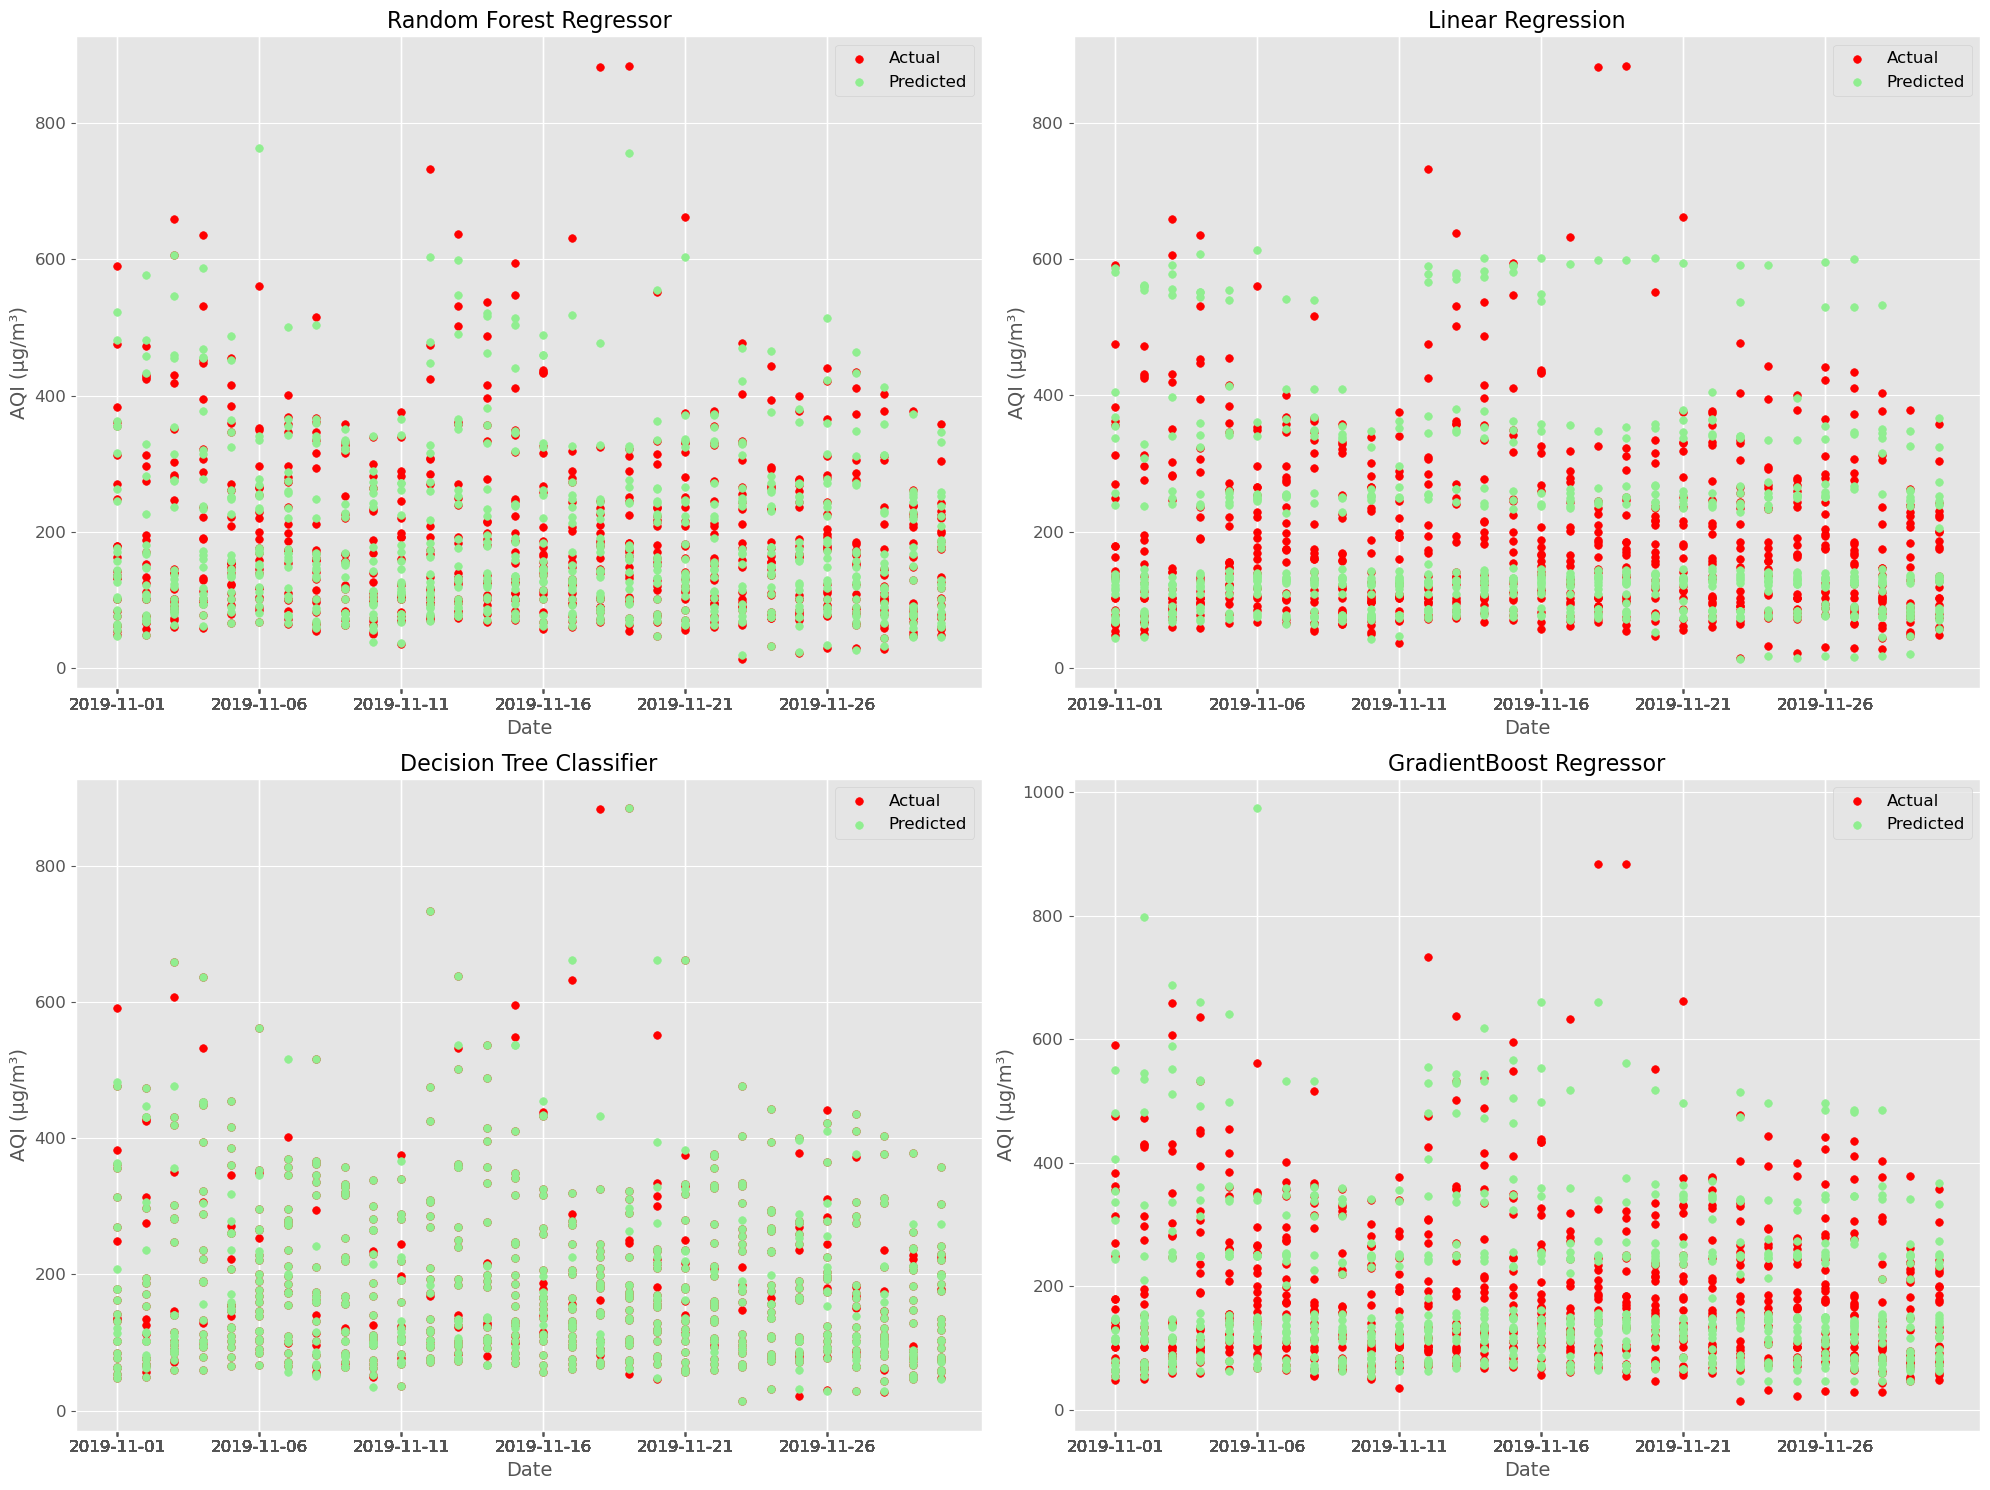

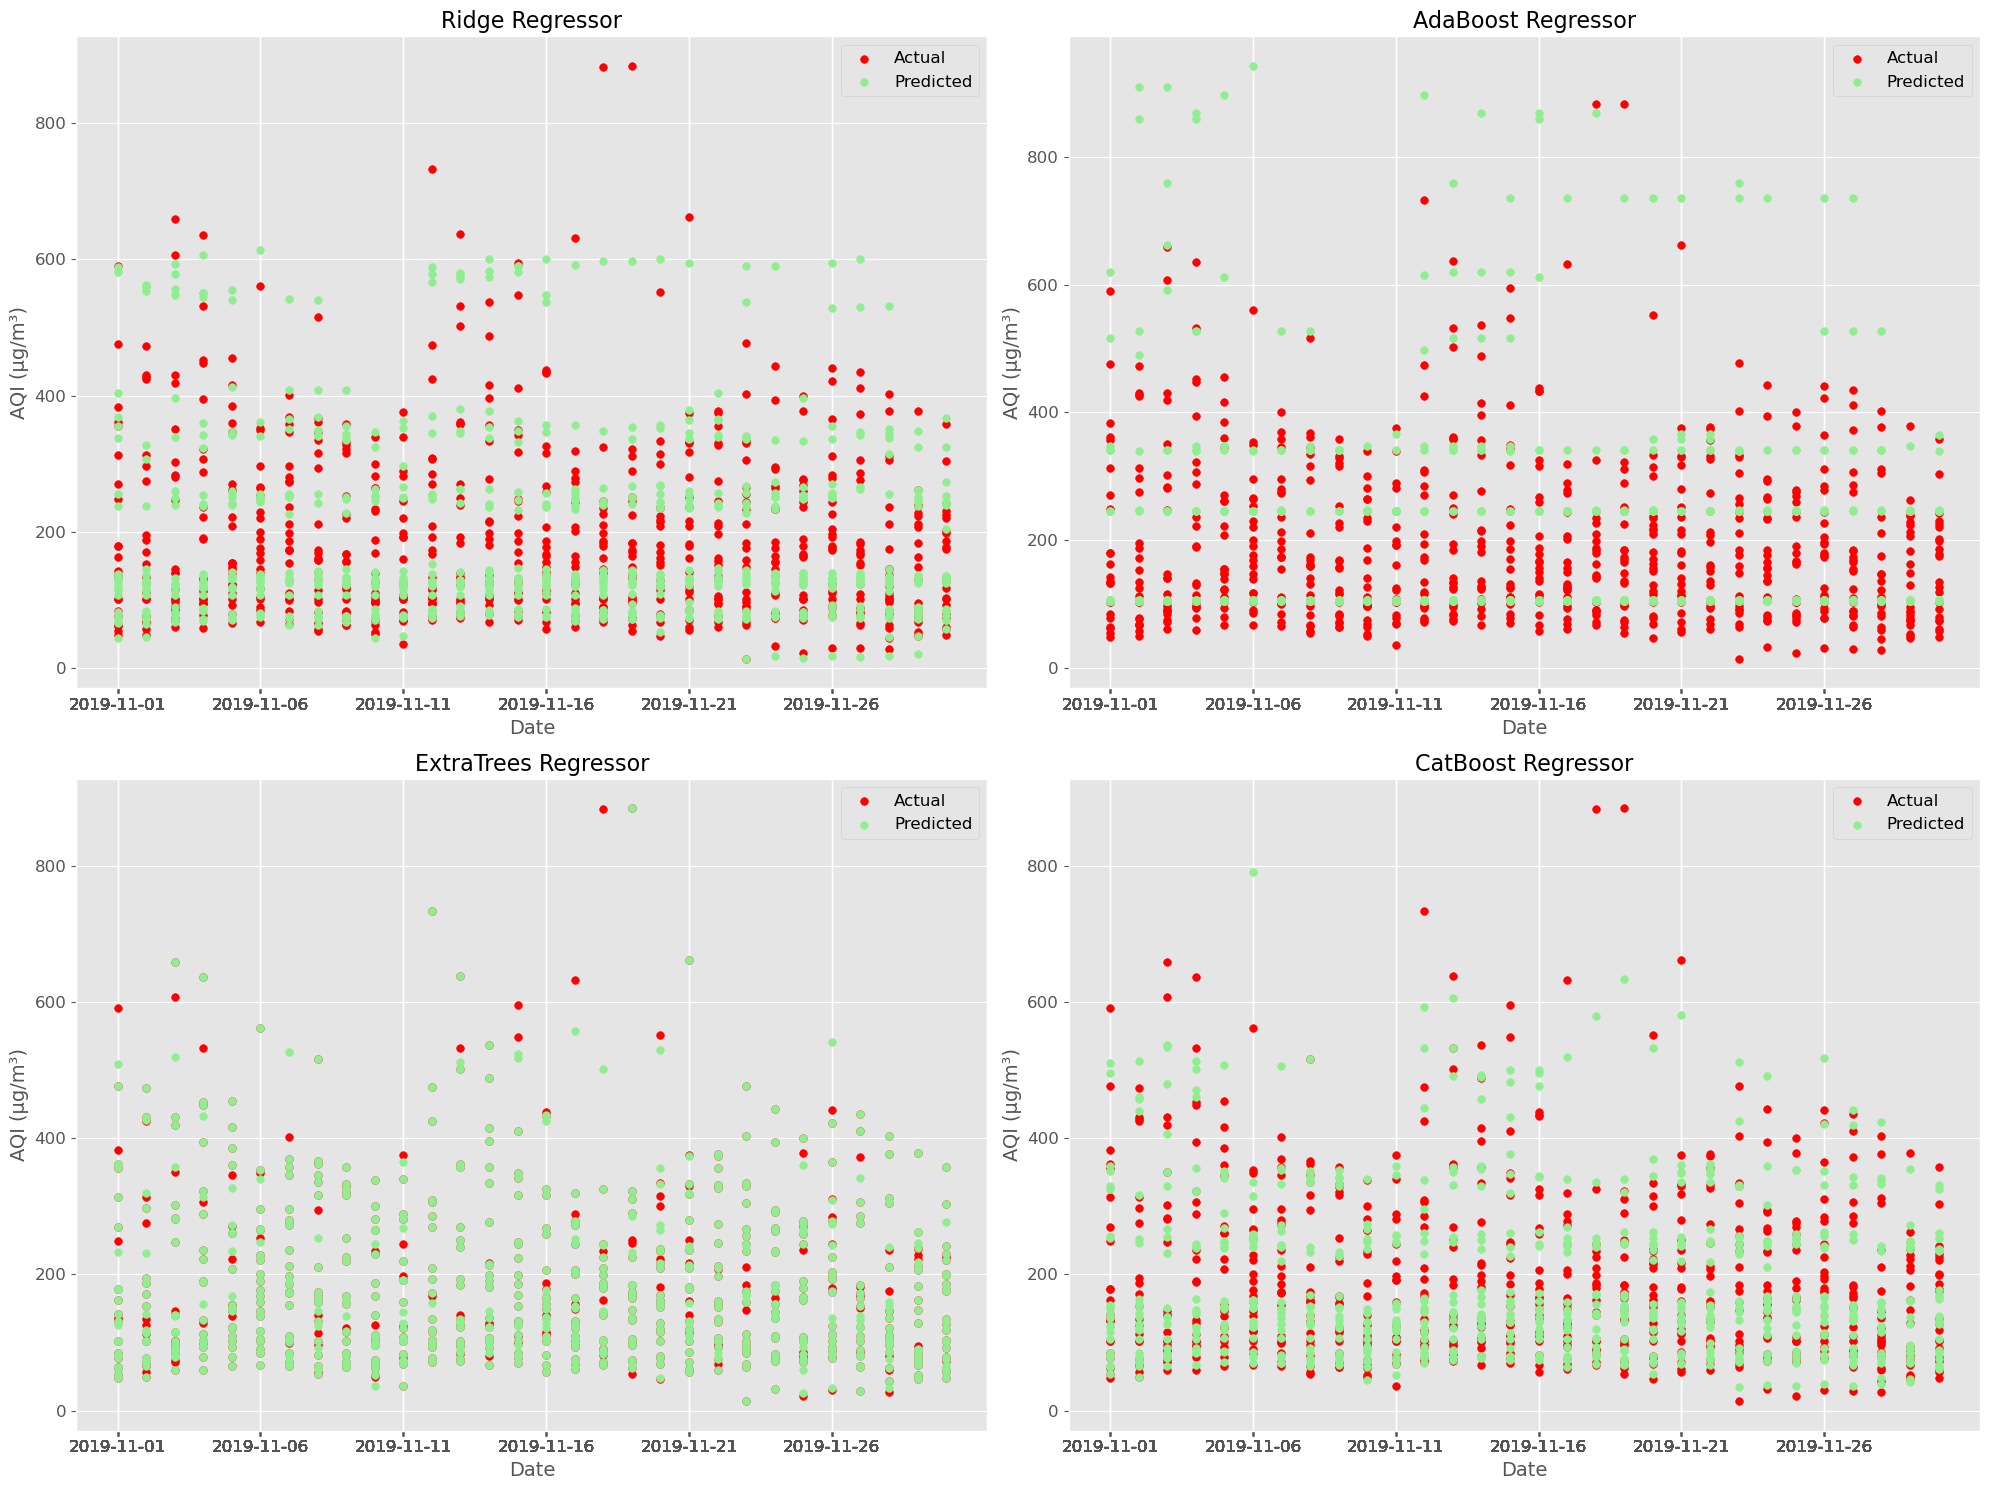

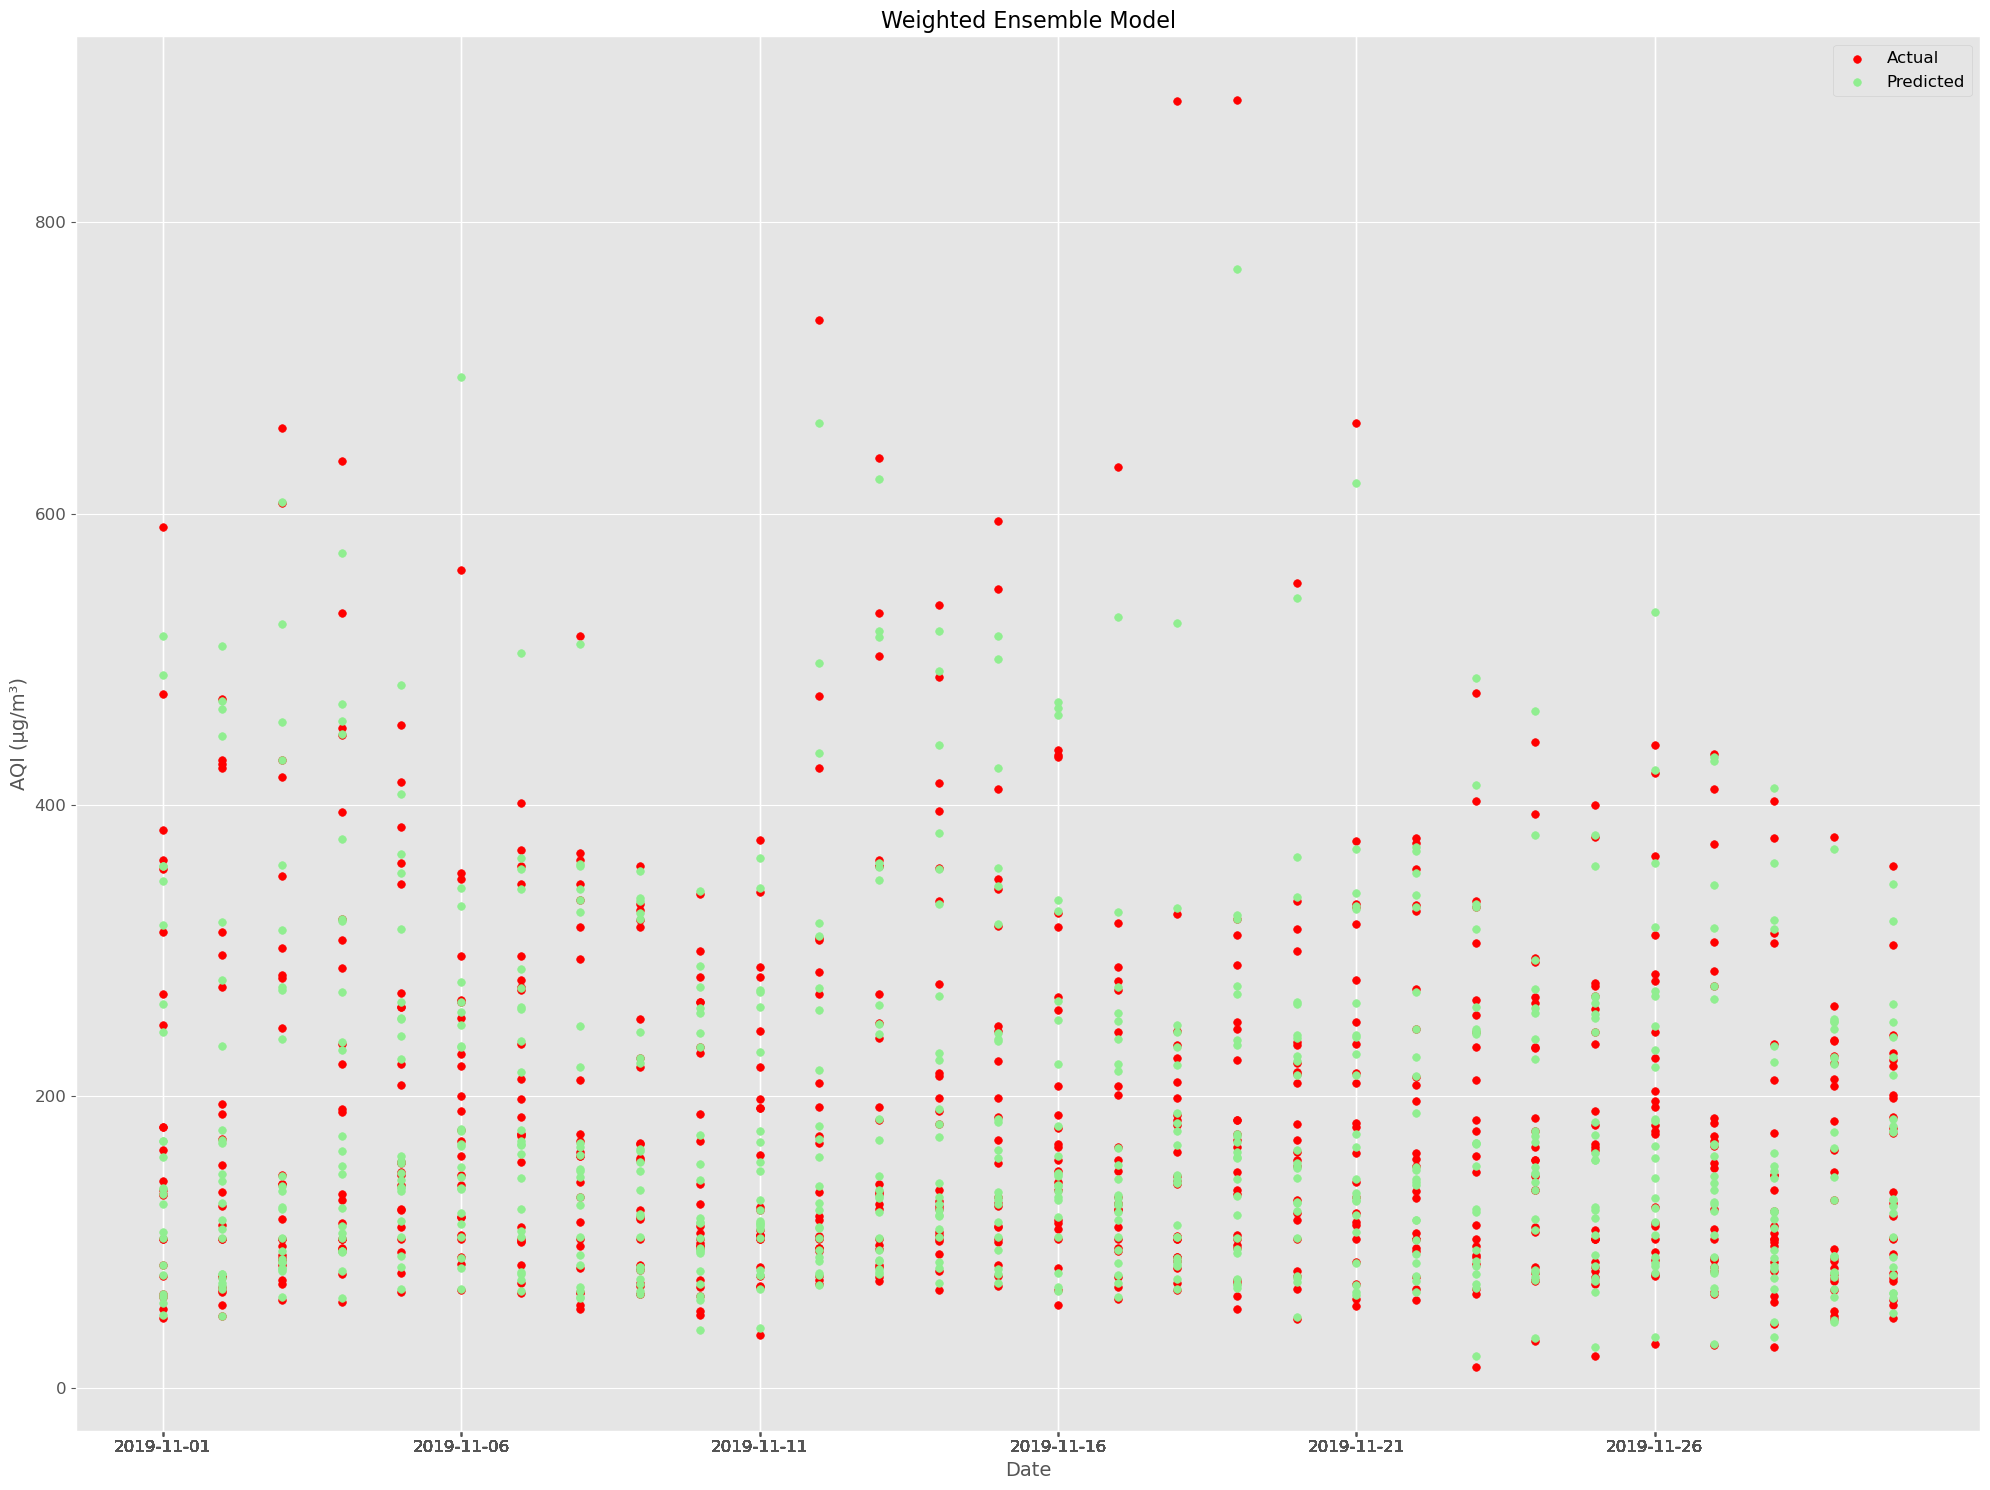

In [38]:
import matplotlib.pyplot as plt

# Filter data for November 2019
df_nov_2019 = df1[(df1['Date'] >= '2019-11-01') & (df1['Date'] <= '2019-11-30')]

# Drop the 'AQI' column and convert 'Date' to Unix timestamp
X_nov_2019 = df_nov_2019.drop(['AQI'], axis=1)
X_nov_2019['Date'] = X_nov_2019['Date'].apply(lambda x: x.timestamp()).astype(int)

# List of models
models = [
    'Random Forest Regressor', 'Linear Regression', 'Decision Tree Classifier',
    'GradientBoost Regressor', 'Ridge Regressor', 'AdaBoost Regressor',
    'ExtraTrees Regressor', 'CatBoost Regressor'
]

# Dictionary of trained models
trained_models = {
    name: model for name, model in zip(
        models, [model_rfr, model_lr, model_DT, model_gbr, model_ridge, model_abr, model_etr, model_cb]
    )
}

# Dictionary to store predictions
predictions = {}

# Generate predictions for each model
for name in models:
    model = trained_models[name]
    predictions[name] = model.predict(X_nov_2019)

# Create first set of subplots for the first 4 models
fig1, axs1 = plt.subplots(2, 2, figsize=(20, 15))
axs1 = axs1.flatten()

for i, (name, preds) in enumerate(list(predictions.items())[:4]):
    axs1[i].scatter(df_nov_2019['Date'], df_nov_2019['AQI'], label='Actual', color='red', s=30)
    axs1[i].scatter(df_nov_2019['Date'], preds, label='Predicted', color='lightgreen', s=30)
    axs1[i].set_title(name, fontsize=16)
    axs1[i].set_xlabel('Date', fontsize=14)
    axs1[i].set_ylabel('AQI (µg/m³)', fontsize=14)
    axs1[i].legend(fontsize=12)
    axs1[i].tick_params(axis='both', which='major', labelsize=12)
    axs1[i].set_xticks(df_nov_2019['Date'][::5])  # Display every 5th date

plt.tight_layout()
plt.show()

# Create second set of subplots for the remaining 4 models
fig2, axs2 = plt.subplots(2, 2, figsize=(20, 15))
axs2 = axs2.flatten()

for i, (name, preds) in enumerate(list(predictions.items())[4:]):
    axs2[i].scatter(df_nov_2019['Date'], df_nov_2019['AQI'], label='Actual', color='red', s=30)
    axs2[i].scatter(df_nov_2019['Date'], preds, label='Predicted', color='lightgreen', s=30)
    axs2[i].set_title(name, fontsize=16)
    axs2[i].set_xlabel('Date', fontsize=14)
    axs2[i].set_ylabel('AQI (µg/m³)', fontsize=14)
    axs2[i].legend(fontsize=12)
    axs2[i].tick_params(axis='both', which='major', labelsize=12)
    axs2[i].set_xticks(df_nov_2019['Date'][::5])  # Display every 5th date

plt.tight_layout()
plt.show()

# Create a separate plot for the ensemble model
fig3, ax3 = plt.subplots(figsize=(20, 15))

# Generate predictions for the ensemble model
ensemble_predictions = ensemble.predict(X_nov_2019)

# Plot the ensemble model predictions
ax3.scatter(df_nov_2019['Date'], df_nov_2019['AQI'], label='Actual', color='red', s=30)
ax3.scatter(df_nov_2019['Date'], ensemble_predictions, label='Predicted', color='lightgreen', s=30)
ax3.set_title('Weighted Ensemble Model', fontsize=16)
ax3.set_xlabel('Date', fontsize=14)
ax3.set_ylabel('AQI (µg/m³)', fontsize=14)
ax3.legend(fontsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.set_xticks(df_nov_2019['Date'][::5])  # Display every 5th date

plt.tight_layout()
plt.show()
